<a href="https://colab.research.google.com/github/lofel888/ML_code_projects/blob/main/DZ_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

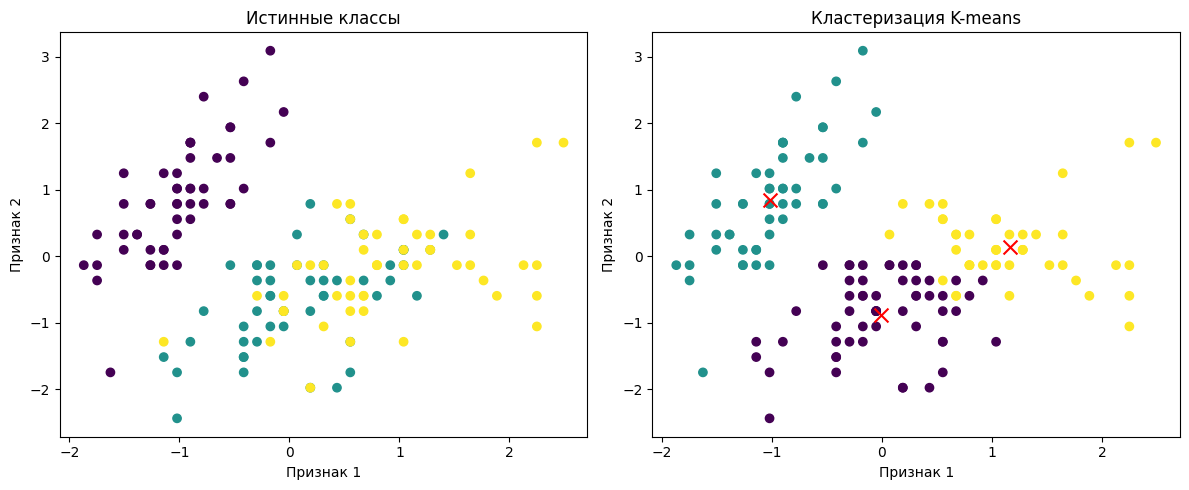

Silhouette Score: 0.463
Центроиды кластеров:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.369231          3.907692           1.523077          0.284615
1           6.262000          2.872000           4.906000          1.676000
2           4.878378          3.259459           1.440541          0.232432


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

class KMeans:
    def __init__(self, n_clusters=3, max_iter=1000, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.labels = None

    def fit(self, X):
        # Инициализация центроидов случайными точками из данных
        n_samples = X.shape[0]
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iter):
            # Назначение кластеров
            distances = self._calc_distances(X)
            self.labels = np.argmin(distances, axis=1)

            # Сохранение старых центроидов для проверки сходимости
            old_centroids = self.centroids.copy()

            # Обновление центроидов
            for i in range(self.n_clusters):
                cluster_points = X[self.labels == i]
                if len(cluster_points) > 0:
                    self.centroids[i] = cluster_points.mean(axis=0)

            # Проверка сходимости
            centroid_shift = np.linalg.norm(old_centroids - self.centroids)
            if centroid_shift < self.tol:
                break

    def predict(self, X):
        distances = self._calc_distances(X)
        return np.argmin(distances, axis=1)

    def _calc_distances(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)
        return distances

# Загрузка и подготовка данных
iris = load_iris()
X = iris.data
y = iris.target

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
labels = kmeans.labels

# Визуализация результатов (используем первые два признака для простоты)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis')
plt.title('Истинные классы')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=100)
plt.title('Кластеризация K-means')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

plt.tight_layout()
plt.show()

# Оценка качества кластеризации
silhouette = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette:.3f}")

# Создание DataFrame из центроидов в исходном масштабе
centroids_df = pd.DataFrame(centroids_original_scale, columns=iris.feature_names)

print("Центроиды кластеров:")
print(centroids_df)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hellbuoy/online-retail-customer-clustering")

print("Path to dataset files:", path)

100%|██████████| 7.22M/7.22M [00:00<00:00, 106MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hellbuoy/online-retail-customer-clustering/versions/1


<ipython-input-31-542792276a9e>:15: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  'InvoiceDate': lambda x: (pd.to_datetime(x.max()) - pd.to_datetime(x.min())).days
<ipython-input-31-542792276a9e>:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


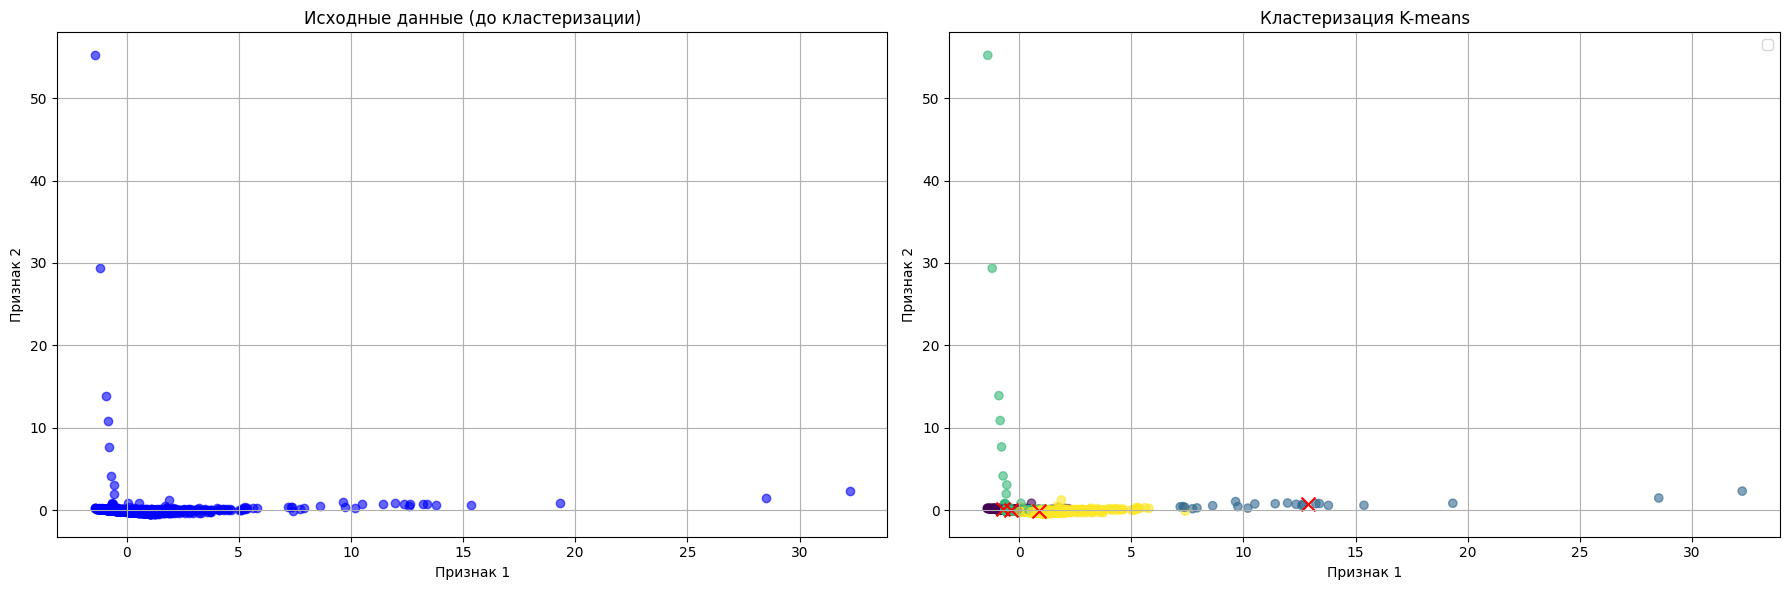


Метрики качества:
Silhouette Score: 0.458
Calinski-Harabasz Index: 1154

Центроиды кластеров:
   InvoiceNo      Quantity  UnitPrice  InvoiceDate
0   3.949875    757.080201   3.711636  -162.380952
1  89.272727  48401.818182   7.722481   211.272727
2   2.759279    494.712432  10.420318    25.258018
3   9.347789   1842.811224   3.669433   268.979592


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Загрузка и предобработка данных
data = pd.read_csv(f"{path}/OnlineRetail.csv", encoding='latin1')
data_clean = data.dropna(subset=['CustomerID'])
customer_data = data_clean.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'InvoiceDate': lambda x: (pd.to_datetime(x.max()) - pd.to_datetime(x.min())).days
}).reset_index()

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_data.drop('CustomerID', axis=1))

# Применение K-means
kmeans = KMeans(n_clusters=4, max_iter=300, tol=1e-4)
kmeans.fit(X_scaled)
labels = kmeans.labels

# Уменьшение размерности для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Уменьшение размерности для центроидов (используем тот же PCA)
centroids_pca = pca.transform(kmeans.centroids)

plt.figure(figsize=(18, 6))

# График 1: Исходные данные
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.6)
plt.title("Исходные данные (до кластеризации)")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.grid(True)

# График 2: Результаты K-means с центроидами
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=100)  # Центроиды
plt.title("Кластеризация K-means")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Вывод центроидов и метрик
centroids_original = scaler.inverse_transform(kmeans.centroids)
centroids_df = pd.DataFrame(centroids_original,
                          columns=['InvoiceNo', 'Quantity', 'UnitPrice', 'InvoiceDate'])  # Явное указание всех 4 признаков

print("\nМетрики качества:")
print(f"Silhouette Score: {silhouette_score(X_scaled, labels):.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(X_scaled, labels):.0f}")
print("\nЦентроиды кластеров:")
print(centroids_df)